# DeepLabCut Toolbox - Colab for standard (single animal) projects!

This notebook is a modified version of the demonstration notebook provided by <font color="green">DeepLabCut</font>. For the original version refer to the [GitHub page of the DeepLabCut](https://github.com/DeepLabCut/DeepLabCut).

![DeepLabCut GIF](https://images.squarespace-cdn.com/content/v1/57f6d51c9f74566f55ecf271/1619609897110-TKSTWKEM6HTGXID9D489/triMouseDLC.gif?format=2500w)


This notebook illustrates how to use the cloud to:
- create a training set
- train a network
- evaluate a network
- create simple quality check plots
- analyze novel videos!

### This notebook assumes you already have a project folder with labeled data (which we have saved previously on Google Drive)!

This notebook demonstrates the necessary steps to use <font color="green">DeepLabCut</font> for your own project.

This shows the most simple code to do so, but many of the functions have additional features, so please check out the [overview & the protocol paper](https://deeplabcut.github.io/DeepLabCut/docs/standardDeepLabCut_UserGuide.html) for detailed explanations of each step!

Nath\*, Mathis\* et al.: Using <font color="green">DeepLabCut</font> for markerless pose estimation during behavior across species. Nature Protocols, 2019.


Paper: [Link](https://www.nature.com/articles/s41596-019-0176-0)

------------

## **Before you start**
First, go to ``Runtime`` -> ``change runtime type`` -> select ``Python3``, and then select ``GPU``.

In [5]:
#(this will take a few minutes to install all the dependences!)
!apt update && apt install cuda-11-8
!pip install "deeplabcut[tf]"

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,561 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,846 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,076 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-secu

**Be sure to click ``RESTART RUNTIME`` if it is displayed above before moving on!**

## Link your Google Drive (with your labeled data, or the demo data):



In [1]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define source and destination paths
source_folder = '/content/drive/MyDrive/behavior&calcium-imaging-workshop'  # Update with your shared folder path
destination_folder = '/content/behavior&calcium-imaging-workshop'  # Content folder in Colab

# Copy files from source to destination folder
shutil.copytree(source_folder, destination_folder)

print("Files copied successfully!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileExistsError: [Errno 17] File exists: '/content/behavior&calcium-imaging-workshop'

YOU WILL NEED TO EDIT THE PROJECT PATH **in the config.yaml file** TO BE SET TO YOUR GOOGLE DRIVE LINK!

Typically, this will be: /content/drive/My Drive/yourProjectFolderName


In [2]:
# Setup your project variables:
ProjectFolderName = 'deeplabcut-network-workshop'
VideoType = 'mp4'

#don't edit these:
videofile_path = ['/content/behavior&calcium-imaging-workshop/'+ProjectFolderName+'/videos/'] # Enter the list of videos or folder to analyze.
videofile_path

['/content/behavior&calcium-imaging-workshop/deeplabcut-network-workshop/videos/']

In [3]:
import deeplabcut

Loading DLC 2.3.9...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


In [4]:
deeplabcut.__version__

'2.3.9'

In [5]:
#This creates a path variable that links to your google drive copy
#No need to edit this, as you set it up before:
path_config_file = '/content/behavior&calcium-imaging-workshop/'+ProjectFolderName+'/config.yaml'
path_config_file

'/content/behavior&calcium-imaging-workshop/deeplabcut-network-workshop/config.yaml'

## Create a training dataset:
### You must do this step inside of Colab:
After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

Now it is the time to start training the network!

In [6]:
# Then, run this cell. There are many more functions you can set here, including which network to use, you can experiment with the parameters.
# Refer to the DeepLabCut User Guide for explaination.

deeplabcut.create_training_dataset(path_config_file, net_type='resnet_50', augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([142,   6,  60, 339,  54, 286, 126, 217, 254, 100, 101, 234, 272,
          282, 240,  37,  64, 189,  56,  15, 287,  68, 310, 133, 235, 334,
          276,  26,  55, 278, 336, 196,  20,  78, 103, 190, 204, 230,  59,
           65, 146,  63,  74, 166, 173,   7, 291, 198, 311, 250,  92,  89,
          124, 102, 144, 218,  52, 164, 210, 263, 214, 219,  76, 212, 231,
          299,  21, 248, 132,  49, 237, 326, 122, 168, 252,  90,  22, 156,
          293, 266,  66, 215,  12, 106, 141, 279,  17, 344, 113, 137, 236,
          246, 136, 315, 268, 260, 170, 283, 135,  81,   1, 120,   8, 245,
          221, 249, 313, 213, 300, 261, 229, 145,   5,  33, 324, 116,  34,
          241,  97,  85, 191, 134, 340,  45, 140, 228, 337, 167, 150, 108,
           46, 274, 162,  73, 327, 179, 302,  29, 329, 281,  27, 206, 158,
          153, 255, 171, 159, 220, 226,  35, 205, 341, 208, 269,  44, 175,
          129,  93, 111, 224, 200,  18, 232,  79, 181,  71, 304, 289, 331,
          17

In the next cell, we'll be updating the pose configuration file, which contains all the settings necessary for training. This step ensures that we initialize the training process using weights obtained from previous training sessions.

This step is crucial because training the network to achieve optimal performance can be time-consuming, often taking several hours. Unfortunately, this duration far exceeds the time constraints of the workshop.

In [7]:
import yaml

pose_cfg_path = '/content/behavior&calcium-imaging-workshop/deeplabcut-network-workshop/dlc-models/iteration-5/ss_vs_sscwJan30-trainset95shuffle1/train/pose_cfg.yaml'
checkpoint = '/content/behavior&calcium-imaging-workshop/deeplabcut-network-workshop/old_dlc-models/iteration-5/ss_vs_sscwJan30-trainset95shuffle2/train/snapshot-100000'

# Load the pose_cfg.yaml file
with open(pose_cfg_path, 'r') as file:
    pose_cfg_content = yaml.safe_load(file)

# Replace the value of 'init_weights' with the checkpoint path
pose_cfg_content['init_weights'] = checkpoint

# Write the modified content back to pose_cfg.yaml
with open(pose_cfg_path, 'w') as file:
    yaml.dump(pose_cfg_content, file)


## Start training:
This function trains the network for a specific shuffle of the training dataset.

In [8]:
#let's also change the display and save_iters just in case Colab takes away the GPU...
#if that happens, you can reload from a saved point. Typically, you want to train to 200,000 + iterations.
#more info and there are more things you can set: https://github.com/DeepLabCut/DeepLabCut/wiki/DOCSTRINGS#train_network

deeplabcut.train_network(path_config_file, shuffle=1, displayiters=10,saveiters=50, maxiters=100)

#this will run until you stop it (CTRL+C), or hit "STOP" icon, or when it hits the end (default, 1.03M iterations).
#Whichever you chose, you will see what looks like an error message, but it's not an error - don't worry....

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12]],
 'all_joints_names': ['Nose',
                      'FrontPawR',
                      'FrontPawL',
                      'BodyMid',
                      'HindPawR',
                      'HindPawL',
                      'TailBase',
                      'TailTip',
                      'BottomLeftcorner',
                      'UpperLeftcorner',
                      'BottomRightcorner',
                      'UpperRightcorner',
                      'Door'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alph

Selecting single-animal trainer
Batch Size is 1


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading already trained DLC with backbone: resnet_50
Max_iters overwritten as 100
Display_iters overwritten as 10
Save_iters overwritten as 50
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/behavior&calcium-imaging-workshop/deeplabcut-network-workshop/dlc-models/iteration-5/ss_vs_sscwJan30-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairw

iteration: 100010 loss: 0.0107 lr: 0.005
iteration: 100020 loss: 0.0138 lr: 0.005
iteration: 100030 loss: 0.0064 lr: 0.005
iteration: 100040 loss: 0.0037 lr: 0.005
iteration: 100050 loss: 0.0091 lr: 0.005
iteration: 100060 loss: 0.0104 lr: 0.005
iteration: 100070 loss: 0.0070 lr: 0.005
iteration: 100080 loss: 0.0073 lr: 0.005
iteration: 100090 loss: 0.0091 lr: 0.005
iteration: 100100 loss: 0.0067 lr: 0.005
Exception in thread Thread-10 (load_and_enqueue):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py", line 1378, in _do_call
    return fn(*args)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py", line 1361, in _run_fn
    return self._call_tf_sessionrun(options, feed_dict, fetch_list,
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py", line 1454, in _call_tf_sessionrun
    return tf_session.TF_SessionRun_wrapper(self._session, options, feed_dict,


The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


**When you hit ``STOP`` you will get a KeyInterrupt ``error``! No worries! :)**

## Start evaluating:

This function assesses a trained model's performance for a specific shuffle or shuffles at a particular state or across all states on the dataset (images). The results are stored as a .csv file in a subdirectory under **evaluation-results**.

*Look through the results in the **evaluation-results** directory.* Additionally, *review the very end of the output to identify train and test errors.*

*How do you judge the model's performance?*


In [1]:
%matplotlib notebook
deeplabcut.evaluate_network(path_config_file,plotting=True)

# Here you want to see a low pixel error! Of course, it can only be as good as the labeler,
#so be sure your labels are good! (And you have trained enough ;)

NameError: name 'deeplabcut' is not defined

## There is an optional refinement step you can do outside of Colab:
- if your pixel errors are not low enough, please check out the protocol guide on how to refine your network!
- You will need to adjust the labels **outside of Colab!** We recommend coming back to train and analyze videos...
- Please see the repo and protocol instructions on how to refine your data!

## Start Analyzing videos:
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides.

In [13]:
videofile_path = ['/content/behavior&calcium-imaging-workshop/data/behavior-data/day0.mp4', '/content/behavior&calcium-imaging-workshop/data/behavior-data/day1.mp4]
deeplabcut.analyze_videos(path_config_file,videofile_path, videotype=VideoType)

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-13-b6caa06960c6>, line 1)

## Plot the trajectories of the analyzed videos:
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [10]:
!pip install mpld3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 2.1 MB/s eta 0:00:00


In [11]:
deeplabcut.plot_trajectories(path_config_file,videofile_path, videotype=VideoType)

No videos found. Make sure you passed a list of videos and that *videotype* is right.


You can view these graphs in Google Drive, but they are also available for visualization within the notebook. Execute the following cell and attempt to interpret the plots.

*Is the performance of the model on our data satisfactory?*

Additionally, update the plot paths to visualize the graphs from the other videos.

NotADirectoryError: [Errno 20] Not a directory: '/content/behavior&calcium-imaging-workshop/data/behavior-data/day0.mp4/plot-likelihood.png'

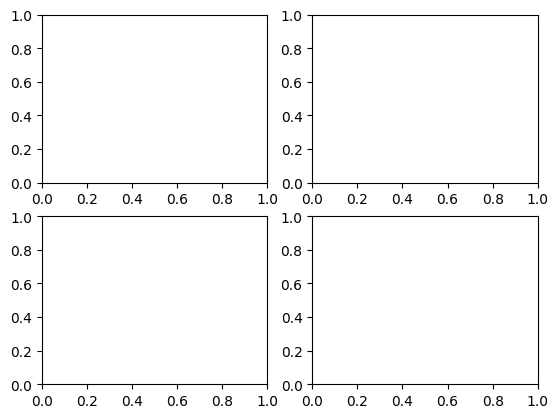

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
import mpld3

# Define paths to the images
plot_likelihood_path = '/content/behavior&calcium-imaging-workshop/data/behavior-data/day0.mp4/plot-likelihood.png'
hist_path = '/content/behavior&calcium-imaging-workshop/data/behavior-data/day0.mp4/hist.png'
plot_path = '/content/behavior&calcium-imaging-workshop/data/behavior-data/day0.mp4/plot.png'
trajectory_path = '/content/behavior&calcium-imaging-workshop/data/behavior-data/day0.mp4/trajectory.png'

# Create a figure and axis
fig, axes = plt.subplots(2, 2)

# Read and plot each image on the corresponding axis
images = [plot_likelihood_path, hist_path, plot_path, trajectory_path]
titles = ['Plot Likelihood', 'Histogram', 'Plot', 'Trajectory']

for ax, image, title in zip(axes.ravel(), images, titles):
    img = Image.open(image)
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

# Convert the Matplotlib figure to an interactive HTML plot using mpld3
html_plot = mpld3.fig_to_html(fig)

# Display the HTML plot
display(HTML(html_plot))

Now you can look at the plot-poses file and check the "plot-likelihood.png" might want to change the "p-cutoff" in the config.yaml file so that you have only high confidnece points plotted in the video. i.e. ~0.8 or 0.9. The current default is 0.4.

## Create labeled video:
This function is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides.

In [ ]:
deeplabcut.create_labeled_video(path_config_file,videofile_path, videotype=VideoType)

In [17]:
import cv2
import matplotlib.pyplot as plt

# Define the path to the labeled video
labelled_video_path = '/content/behavior&calcium-imaging-workshop/data/behavior-data/day0DLC_resnet50_ss_vs_sscwJan30shuffle1_101000_labeled.mp4'

# Read the video
video_capture = cv2.VideoCapture(labelled_video_path)

# Read the first frame
ret, frame = video_capture.read()

# Convert the frame from BGR to RGB (OpenCV reads images in BGR format)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the frame using matplotlib
ax.imshow(frame_rgb)
ax.axis('off')  # Hide axes

# Convert the Matplotlib figure to an interactive HTML plot using mpld3
html_plot = mpld3.fig_to_html(fig)

# Display the HTML plot
display(HTML(html_plot))


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
